In [1]:
# -*- coding: utf-8 -*-
# @author: tongzi
# @description: matplotlib learning
# @created date: 2019/07/09
# @ last modified: 2019/07/09


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # 导入3D绘图支持
%matplotlib notebook

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### 求任意多项式的极值并将结果可视化

In [3]:
from sympy import *

In [4]:
import mpl_toolkits.axisartist as axisartist

In [56]:
def count_extreme(args):
    # 声明符号变量
    sign_x = Symbol('x')
    sign_y = 0
    
    # 数值x和y，用于画图
    num_x = np.arange(-5, 5, 0.01)
    num_y = np.zeros(len(num_x))
    
    # 构建多项式
    # item[0]是系数，item[1]是指数
    for item in args:
        sign_y += item[0]*sign_x**item[1]
        num_y += item[0]*num_x**item[1]
    # y对x求导
    dy = diff(sign_y, sign_x)
    
    # 令导数为零 求零点
    extreme_x_list = solve(dy, sign_x)
    if len(extreme_x_list) == 0:
        return 'No extreme value' # 没有极值
    
    print(extreme_x_list)
    
    fig = plt.figure(figsize=(12, 8))
    ax = axisartist.Subplot(fig, 111)
    fig.add_axes(ax)
    
    #x-y坐标轴标注
    plt.annotate('X轴', xy=(max(num_x), 0), xycoords='data',
                 xytext=(0, 5), textcoords='offset points',
                fontsize=16, fontproperties='SimHei')
    plt.annotate('Y轴', xy=(0, max(num_y)), xycoords='data',
                 xytext=(5, 0), textcoords='offset points',
                fontsize=16, fontproperties='SimHei')
    plt.title(str(sign_y))
    
    plt.plot(num_x, num_y)
    for i, extreme_x in enumerate(extreme_x_list):
        # 求极值点的y坐标
        extrem_y = sign_y.evalf(subs={sign_x:extreme_x})
        if(isinstance(extrem_y, numbers.Zero)):
            return "Extreme value is not real!"
        p = plt.scatter(extreme_x, extrem_y, s=50, c='black')
        
        plt.annotate('y({:.2f})={:.2f}'.format(extreme_x, extrem_y),
                    xy=(extreme_x, extrem_y), xycoords='data',
                    xytext=((-1)**(i+1)*30,(-1)**(i+1)*30),
                    textcoords='offset points', fontsize=16,
                    fontproperties='SimHei',
                    arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))
        plt.legend(handles=[p], labels=['points of extrems value'], loc='best')
        
        #隐藏默认的坐标轴
        ax.axis[:].set_visible(False)
        
        # 新建x-y坐标轴
        ax.axis['x'] = ax.new_floating_axis(0, 0)
        # 加上箭头
        ax.axis['x'].set_axisline_style('->', size=1.0)
        ax.axis['y'] = ax.new_floating_axis(1, 0)
        ax.axis['y'].set_axisline_style('-|>', size=1.0)
        # 设置刻度显示方向
        ax.axis['x'].set_axis_direction('top') # 向上
        ax.axis['y'].set_axis_direction('right') # 向右
    plt.grid(True)
    plt.grid(color='black', linestyle='--')
    plt.show()

下面求解多项式$\frac{1}{3} x^3 + 2 x^2 + 2 x=0$的实数根:

[-0.449489742783178, 4.44948974278318]


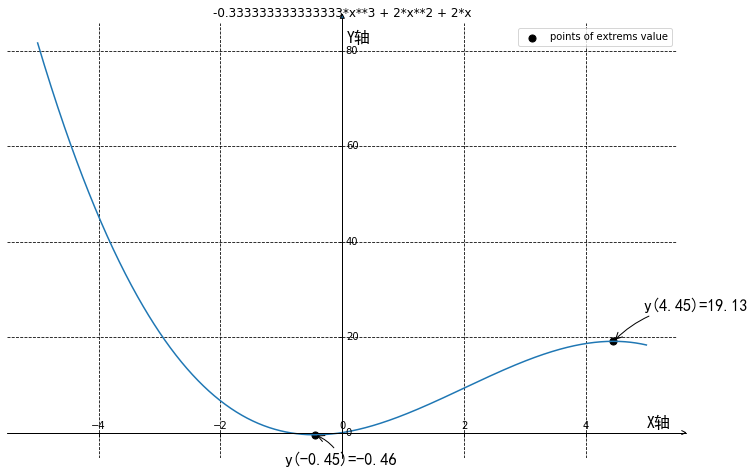

None


In [57]:
print(count_extreme([(-1/3, 3), (2, 2), (2, 1), ]))